In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets


In [3]:
n_pts = 500
centres= ([-0.5,0.5],[0.5,-0.5])
X,y = datasets.make_circles(n_samples=n_pts,random_state=123, noise=0.1, factor=0.2 )#diameter of inner circle is 20% the outer circle)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1))

In [4]:
def scatter_plot():
    plt.scatter(X[y==0,0], X[y==0,1])
    plt.scatter(X[y==1,0], X[y==1,1])

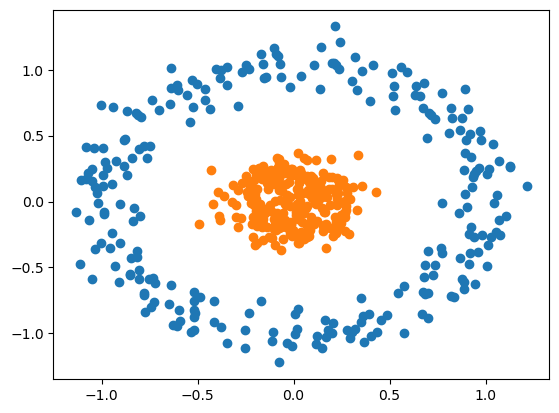

In [5]:
scatter_plot()

In [12]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else: 
      return 0



In [13]:
torch.manual_seed(2)

In [14]:
model = Model(2,4,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [20]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)


In [21]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i , "loss", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss 0.009851191192865372
epoch:  1 loss 0.009800589643418789
epoch:  2 loss 0.009750895202159882
epoch:  3 loss 0.009701799601316452
epoch:  4 loss 0.009653090499341488
epoch:  5 loss 0.009604754857718945
epoch:  6 loss 0.009556849487125874
epoch:  7 loss 0.009509301744401455
epoch:  8 loss 0.009462028741836548
epoch:  9 loss 0.009414995089173317
epoch:  10 loss 0.009368212893605232
epoch:  11 loss 0.00932170357555151
epoch:  12 loss 0.009275478310883045
epoch:  13 loss 0.009229549206793308
epoch:  14 loss 0.009183913469314575
epoch:  15 loss 0.009138567373156548
epoch:  16 loss 0.009093517437577248
epoch:  17 loss 0.009048768319189548
epoch:  18 loss 0.00900432001799345
epoch:  19 loss 0.008960171602666378
epoch:  20 loss 0.008916322141885757
epoch:  21 loss 0.00887276977300644
epoch:  22 loss 0.008829510770738125
epoch:  23 loss 0.008786543272435665
epoch:  24 loss 0.008743872866034508
epoch:  25 loss 0.008701496757566929
epoch:  26 loss 0.008659416809678078
epoch:  27 los

Text(0.5, 0, 'epochs')

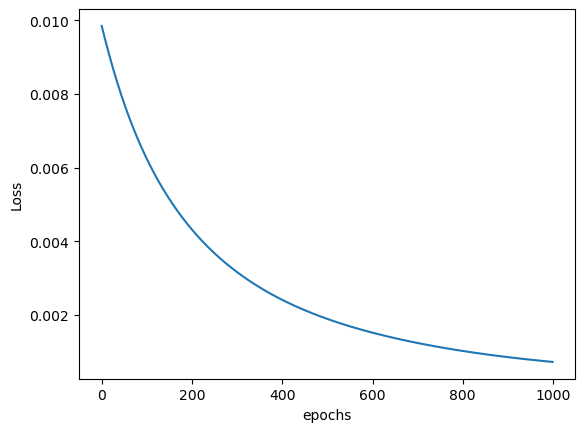

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [30]:
#testing the model
def plot_decision_boundary(X,y):
    x_span = np.linspace(min(X[:,0]), max(X[:, 0]))
    y_span = np.linspace(min(X[:,1]), max(X[:, 1]))
    xx,yy = np.meshgrid(x_span, y_span)
    print(x_span)
    print(xx , '\n')
    print(yy)

In [31]:
plot_decision_boundary(X,y)

[-1.13339265 -1.08546    -1.03752735 -0.98959471 -0.94166206 -0.89372941
 -0.84579676 -0.79786411 -0.74993147 -0.70199882 -0.65406617 -0.60613352
 -0.55820088 -0.51026823 -0.46233558 -0.41440293 -0.36647028 -0.31853764
 -0.27060499 -0.22267234 -0.17473969 -0.12680704 -0.0788744  -0.03094175
  0.0169909   0.06492355  0.11285619  0.16078884  0.20872149  0.25665414
  0.30458679  0.35251943  0.40045208  0.44838473  0.49631738  0.54425002
  0.59218267  0.64011532  0.68804797  0.73598062  0.78391326  0.83184591
  0.87977856  0.92771121  0.97564386  1.0235765   1.07150915  1.1194418
  1.16737445  1.21530709]
[[-1.13339265 -1.08546    -1.03752735 ...  1.1194418   1.16737445
   1.21530709]
 [-1.13339265 -1.08546    -1.03752735 ...  1.1194418   1.16737445
   1.21530709]
 [-1.13339265 -1.08546    -1.03752735 ...  1.1194418   1.16737445
   1.21530709]
 ...
 [-1.13339265 -1.08546    -1.03752735 ...  1.1194418   1.16737445
   1.21530709]
 [-1.13339265 -1.08546    -1.03752735 ...  1.1194418   1.16737